# Achievement 2.6: Interactive Dashboard with Plotly and Streamlit

This notebook creates interactive visualizations using Plotly and prepares them
for integration into a Streamlit dashboard. It builds on previous exercises by
focusing on interactivity and user engagement. The charts include:

1. A horizontal bar chart showing the top 20 most popular starting stations.
2. A dual-axis line chart showing the relationship between trip volume and temperature.

Data is filtered to only include the year 2022.

## 1. Imports and Setup

In [10]:
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

## 2. Load and Inspect Data

In [11]:
# Load merged Citi Bike + NOAA weather data
# Dataset was created in Exercise 2.5

df = pd.read_csv("citibike_weather_merged_2022.csv", parse_dates=["started_at"])
print("✅ Data shape:", df.shape)
df.head()

C:\Users\rewha\AppData\Local\Temp\ipykernel_9020\2306130485.py:4: DtypeWarning:

Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.



✅ Data shape: (29838806, 17)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,PRCP,TMAX,TMIN
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,23.0,15.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,42.0,26.0
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,30.0,21.0
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,39.0,24.0
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,30.0,14.0


## 3. Top 20 Starting Stations (Bar Chart)

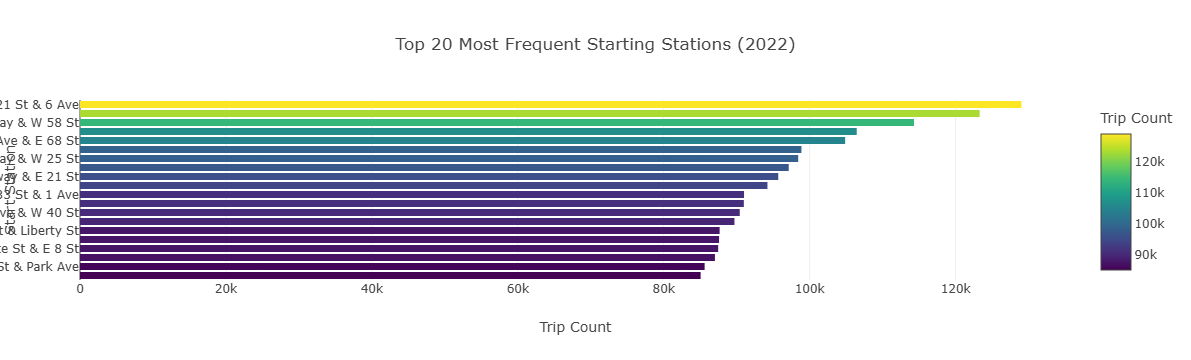

In [12]:
# Count trips by start station
top_stations = df['start_station_name'].value_counts().head(20).reset_index()
top_stations.columns = ['start_station_name', 'trip_count']

# Plot horizontal bar chart using Plotly Express
fig_bar = px.bar(
    top_stations,
    x='trip_count',
    y='start_station_name',
    orientation='h',
    title='Top 20 Most Frequent Starting Stations (2022)',
    labels={'start_station_name': 'Start Station', 'trip_count': 'Trip Count'},
    color='trip_count',
    color_continuous_scale='Viridis'
)

# Reverse the y-axis so most frequent appears at the top
fig_bar.update_layout(yaxis=dict(autorange='reversed'))

# Render chart
fig_bar.show()

## 4. Dual-Axis Line Chart (Trips vs Temp)

In [13]:
# Extract date and filter to 2022 only
df['date'] = pd.to_datetime(df['started_at']).dt.date
df = df[pd.to_datetime(df['date']).dt.year == 2022]

# Group by date
daily_trips = df.groupby('date').size().reset_index(name='trip_count')
daily_weather = df.groupby('date')[['TMAX']].mean().reset_index()

# Merge for dual-axis chart
merged = pd.merge(daily_trips, daily_weather, on='date')

# Create subplot with secondary Y-axis
fig_line = make_subplots(specs=[[{"secondary_y": True}]])

# Line for trip count
fig_line.add_trace(
    go.Scatter(x=merged['date'], y=merged['trip_count'],
               name='Trip Count', mode='lines', line=dict(color='blue')),
    secondary_y=False
)

# Line for max temperature
fig_line.add_trace(
    go.Scatter(x=merged['date'], y=merged['TMAX'],
               name='Max Temp (°F)', mode='lines', line=dict(color='red')),
    secondary_y=True
)

# Chart formatting
fig_line.update_layout(
    title_text="Daily Citi Bike Trips vs. Max Temperature (2022)",
    xaxis_title="Date"
)
fig_line.update_yaxes(title_text="Trip Count", secondary_y=False)
fig_line.update_yaxes(title_text="Max Temperature (°F)", secondary_y=True)

# Render for Streamlit
st.plotly_chart(fig_line, use_container_width=True)

2025-07-18 15:44:46.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 15:44:46.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 15:44:46.071 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 15:44:46.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 15:44:46.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()